In [21]:
%matplotlib inline
from argparse import Namespace
from matplotlib import pyplot as plt
import numpy as np
import torch

torch.set_printoptions(edgeitems=2)
torch.manual_seed(123)

In [2]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

In [3]:
from torchvision import datasets, transforms
data_path = 'data-unversioned/p1ch7/'
cifar10 = datasets.CIFAR10(
    data_path, train=True, download=True,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             (0.2470, 0.2435, 0.2616))
    ]))

Files already downloaded and verified


In [4]:
cifar10_val = datasets.CIFAR10(
    data_path, train=False, download=False,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             (0.2470, 0.2435, 0.2616))
    ]))

In [5]:
label_map = {0: 0, 2: 1}
class_names = ['airplane', 'bird']
cifar2 = [(img, label_map[label])
          for img, label in cifar10 
          if label in [0, 2]]
cifar2_val = [(img, label_map[label])
              for img, label in cifar10_val
              if label in [0, 2]]

In [6]:
import torch.nn as nn

n_out = 2

model = nn.Sequential(
    nn.Linear(3072, 512),
    nn.Tanh(),
    nn.Linear(512, n_out))

In [7]:
def softmax(x):
    return torch.exp(x) / torch.exp(x).sum()

In [8]:
x = torch.tensor([1.0, 2.0, 3.0])

softmax(x)

tensor([0.0900, 0.2447, 0.6652])

In [9]:
softmax(x).sum()

tensor(1.)

In [10]:
softmax = nn.Softmax(dim=1)

x = torch.tensor([[1.0, 2.0, 3.0],
                 [1.0, 2.0, 3.0]])

softmax(x)

tensor([[0.0900, 0.2447, 0.6652],
        [0.0900, 0.2447, 0.6652]])

In [11]:
model = nn.Sequential(
    nn.Linear(3072, 512),
    nn.Tanh(),
    nn.Linear(512, 2),
    nn.Softmax(dim=1))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


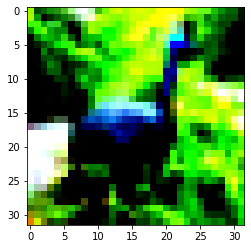

In [12]:
#run the model before training it
img, _ = cifar2[0]
plt.imshow(img.permute(1,2,0))
plt.show()

In [13]:
img_batch = img.view(-1).unsqueeze(0)

In [14]:
out = model(img_batch)
out

tensor([[0.4784, 0.5216]], grad_fn=<SoftmaxBackward0>)

In [15]:
_, index = torch.max(out, dim=1)
index

tensor([1])

In [16]:
model = nn.Sequential(
    nn.Linear(3072, 512),
    nn.Tanh(),
    nn.Linear(512, 2),
    nn.LogSoftmax(dim=1))

loss = nn.NLLLoss()

img, label = cifar2[0]

out = model(img.view(-1).unsqueeze(0))

loss(out, torch.tensor([label]))

tensor(0.5077, grad_fn=<NllLossBackward0>)

In [17]:
def training_loop(n_epochs, model, loss_fn, optimizer, data):
    for epoch in range(n_epochs):
        for img, label in cifar2:
            out = model(img.view(-1).unsqueeze(0))
            loss = loss_fn(out, torch.tensor([label]))
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
        print('Epoch: %d, Loss %f' % (epoch, float(loss)))

In [18]:
import torch
import torch.nn as nn
import torch.optim as optim

model = nn.Sequential(
    nn.Linear(3072, 512),
    nn.Tanh(),
    nn.Linear(512, 2),
    nn.LogSoftmax(dim=1))

learning_rate = 1e-2

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

loss_fn = nn.NLLLoss()

n_epochs=100

training_loop(n_epochs=100,
             model=model,
             loss_fn=loss_fn,
             optimizer=optimizer,
             data=cifar2)

Epoch: 0, Loss 4.550541
Epoch: 1, Loss 8.139921
Epoch: 2, Loss 1.761541
Epoch: 3, Loss 5.512603
Epoch: 4, Loss 8.465409
Epoch: 5, Loss 9.054122
Epoch: 6, Loss 11.672654
Epoch: 7, Loss 9.560898
Epoch: 8, Loss 10.466570
Epoch: 9, Loss 15.005644
Epoch: 10, Loss 2.994224
Epoch: 11, Loss 5.336022
Epoch: 12, Loss 10.343336
Epoch: 13, Loss 11.061426
Epoch: 14, Loss 13.589913
Epoch: 15, Loss 10.360228
Epoch: 16, Loss 6.262290
Epoch: 17, Loss 20.382130
Epoch: 18, Loss 0.016537
Epoch: 19, Loss 16.350868
Epoch: 20, Loss 13.284583
Epoch: 21, Loss 6.852813
Epoch: 22, Loss 9.969567
Epoch: 23, Loss 1.023360
Epoch: 24, Loss 6.608681
Epoch: 25, Loss 6.144263
Epoch: 26, Loss 13.384688
Epoch: 27, Loss 8.928279
Epoch: 28, Loss 14.362111
Epoch: 29, Loss 6.275534
Epoch: 30, Loss 5.441781
Epoch: 31, Loss 13.068040
Epoch: 32, Loss 17.097883
Epoch: 33, Loss 4.326817
Epoch: 34, Loss 13.274837
Epoch: 35, Loss 11.035848
Epoch: 36, Loss 12.313710
Epoch: 37, Loss 16.075966
Epoch: 38, Loss 11.091454
Epoch: 39, Loss 

In [24]:
import torch
import torch.nn as nn

params = Namespace(DataLoader=torch.utils.data.DataLoader,
                   dataset=cifar2,
                  batch_size=64,
                  shuffle=True,
                  learning_rate=1e-2,
                  optimizer=optim.SGD,
                  loss_fn=nn.NLLLoss(),
                  n_epochs=100)

train_loader = params.DataLoader(params.dataset, batch_size=params.batch_size,
                                shuffle=params.shuffle)

model = nn.Sequential(
    nn.Linear(3072, 512),
    nn.Tanh(),
    nn.Linear(512, 2),
    nn.LogSoftmax(dim=1))

optimizer=params.optimizer(model.parameters(), lr=params.learning_rate)

for epoch in range(params.n_epochs):
    for imgs, labels in train_loader:
        batch_size = imgs.shape[0]
        outputs = model(imgs.view(batch_size, -1))
        loss = loss_fn(outputs, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print('Epoch: %d, Loss %f' % (epoch, float(loss)))

Epoch: 0, Loss 0.594021
Epoch: 1, Loss 0.492725
Epoch: 2, Loss 0.436317
Epoch: 3, Loss 0.509323
Epoch: 4, Loss 0.431085
Epoch: 5, Loss 0.572777
Epoch: 6, Loss 0.240891
Epoch: 7, Loss 0.322026
Epoch: 8, Loss 0.436223
Epoch: 9, Loss 0.490084
Epoch: 10, Loss 0.348328
Epoch: 11, Loss 0.278587
Epoch: 12, Loss 0.275147
Epoch: 13, Loss 0.503164
Epoch: 14, Loss 0.246578
Epoch: 15, Loss 0.256272
Epoch: 16, Loss 0.292738
Epoch: 17, Loss 0.182304
Epoch: 18, Loss 0.333581
Epoch: 19, Loss 0.330168
Epoch: 20, Loss 0.568310
Epoch: 21, Loss 0.314019
Epoch: 22, Loss 0.224247
Epoch: 23, Loss 0.199910
Epoch: 24, Loss 0.228315
Epoch: 25, Loss 0.181491
Epoch: 26, Loss 0.283596
Epoch: 27, Loss 0.213896
Epoch: 28, Loss 0.192093
Epoch: 29, Loss 0.225873
Epoch: 30, Loss 0.290780
Epoch: 31, Loss 0.202629
Epoch: 32, Loss 0.086101
Epoch: 33, Loss 0.103419
Epoch: 34, Loss 0.156912
Epoch: 35, Loss 0.246207
Epoch: 36, Loss 0.142003
Epoch: 37, Loss 0.291896
Epoch: 38, Loss 0.257285
Epoch: 39, Loss 0.129855
Epoch: 40,

In [27]:
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64,
                                        shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in val_loader:
        batch_size = imgs.shape[0]
        outputs = model(imgs.view(batch_size, -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
        
print('Accuracy: %f', correct/total)

Accuracy: %f 0.8175


In [31]:
connected_model = nn.Sequential(
    nn.Linear(3072, 1024),
    nn.Tanh(),
    nn.Linear(1024, 512),
    nn.Tanh(),
    nn.Linear(512, 128),
    nn.Tanh(),
    nn.Linear(128, 2),
    nn.LogSoftmax(dim=1))

In [32]:
first_model = nn.Sequential(
    nn.Linear(3072, 1024),
    nn.Tanh(),
    nn.Linear(1024, 512),
    nn.Tanh(),
    nn.Linear(512, 128),
    nn.Tanh(),
    nn.Linear(128, 2))

loss_fn = nn.CrossEntropyLoss()

In [33]:
numel_list = [p.numel() for p in connected_model.parameters()]
sum(numel_list), numel_list

(3737474, [3145728, 1024, 524288, 512, 65536, 128, 256, 2])

In [34]:
numel_list = [p.numel() for p in first_model.parameters()]

In [35]:
numel_list

[3145728, 1024, 524288, 512, 65536, 128, 256, 2]

In [37]:
linear = nn.Linear(3072, 1024)
linear.weight.shape, linear.bias.shape

(torch.Size([1024, 3072]), torch.Size([1024]))